#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SP500 complete
start=datetime.datetime(1995, 1, 1)
end=datetime.datetime(2021, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end)


In [3]:
print(SP500.index)

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)


In [4]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [5]:
print(sectors)

{'Real Estate', 'Information Technology', 'Utilities', 'Energy', 'Communication Services', 'Materials', 'Consumer Staples', 'Industrials', 'Consumer Discretionary', 'Health Care', 'Financials'}


In [6]:
def SectorPrices(sec,df, start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [7]:
SectorPrices("Real Estate", df,start, end)

Date
1995-01-03      71.326289
1995-01-04      71.497550
1995-01-05      71.538375
1995-01-06      71.322940
1995-01-09      71.496336
                 ...     
2020-12-24    1307.739221
2020-12-28    1320.167463
2020-12-29    1303.770239
2020-12-30    1315.966433
2020-12-31    1329.620775
Name: Close, Length: 6547, dtype: float64

In [8]:
def SectorPrices(sec, df,start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [9]:
Seclist = list()


In [10]:
SectorsDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    SectorsDF[s] = SectorPrices(s, df,start, end)
    

Real Estate
Information Technology
Utilities
Energy
Communication Services
Materials
Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
Industrials
Consumer Discretionary
Health Care
- OGN: Data doesn't exist for startDate = 788914800, endDate = 1609455600
Financials
- BRK.B: No data found, symbol may be delisted


In [11]:
print(SectorsDF)

            Real Estate  Information Technology    Utilities      Energy  \
Date                                                                       
1995-01-03    71.326281              245.296012   129.152623   82.377877   
1995-01-04    71.497539              245.055627   129.850471   82.752748   
1995-01-05    71.538380              244.528683   129.708188   82.424174   
1995-01-06    71.322940              247.225136   130.168644   81.928108   
1995-01-09    71.496343              253.207379   129.870996   81.672654   
...                 ...                     ...          ...         ...   
2020-12-24  1307.739240             6167.426149  1426.916826  498.033427   
2020-12-28  1320.167437             6172.350456  1434.416039  493.322148   
2020-12-29  1303.770285             6132.082088  1434.806410  490.629467   
2020-12-30  1315.966433             6172.482685  1442.128435  500.503056   
2020-12-31  1329.620775             6214.575783  1465.399990  495.638868   

           

In [12]:
SectorsDF.index

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

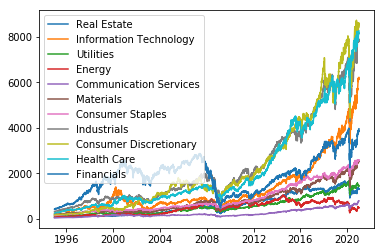

In [13]:
for i in SectorsDF.columns:
    plt.plot(SectorsDF.index,SectorsDF[i], label = i)
plt.legend()
plt.show()

In [14]:
SectorsDF.corr()

,Real Estate,Information Technology,Utilities,Energy,Communication Services,Materials,Consumer Staples,Industrials,Consumer Discretionary,Health Care,Financials
Real Estate,1.000000,0.839935,0.961197,0.837169,0.921607,0.957160,0.962984,0.944046,0.940100,0.927662,0.612228
Information Technology,0.839935,1.000000,0.945063,0.528128,0.967106,0.946043,0.938550,0.963172,0.960444,0.969113,0.741520
Utilities,0.961197,0.945063,1.000000,0.720934,0.975149,0.989725,0.989987,0.988340,0.985234,0.981672,0.688716
Energy,0.837169,0.528128,0.720934,1.000000,0.646336,0.741413,0.716360,0.705057,0.670262,0.655183,0.382736
Communication Services,0.921607,0.967106,0.975149,0.646336,1.000000,0.976221,0.981734,0.987086,0.982749,0.987902,0.772979
Materials,0.957160,0.946043,0.989725,0.741413,0.976221,1.000000,0.989731,0.994866,0.988445,0.984732,0.677433
Consumer Staples,0.962984,0.938550,0.989987,0.716360,0.981734,0.989731,1.000000,0.988301,0.987094,0.988778,0.674960
Industrials,0.944046,0.963172,0.988340,0.705057,0.987086,0.994866,0.988301,1.000000,0.992310,0.991078,0.714916
Consumer Discretionary,0.940100,0.960444,0.985234,0.670262,0.982749,0.988445,0.987094,0.992310,1.000000,0.988327,0.712778
Health Care,0.927662,0.969113,0.981672,0.655183,0.987902,0.984732,0.988778,0.991078,0.988327,1.000000,0.702831
